# **XGBoost Practice**

In [ ]:
!pip install --user xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

credit = pd.read_csv("https://raw.githubusercontent.com/xiang38f/111-2-4-56-midtrem/main/credit_risk_dataset.csv")
print(len(credit.index))
credit.head()

32581


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
credit.describe(exclude=np.number)
# Exclude columns of numerical data types.

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [ ]:
pd.unique(credit["loan_status"])
# different values under the "loan_status" column

array([1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Extract feature and target arrays
X, y = credit.drop('loan_status', axis=1), credit['loan_status']

In [ ]:
# Convert categorical columns to numerical values using LabelEncoder
for col in X.select_dtypes(include=['category']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Encode target column
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

In [ ]:
X.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [ ]:
# Split the data
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.3, random_state=1, stratify=y_encoded)

In [ ]:
# Create DMatrix
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Create label encoders for categorical features
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
le = LabelEncoder()
for col in categorical_features:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Convert the data to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train_encoded, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test_encoded, enable_categorical=True)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Accuracy: 0.9358884063823558
Accuracy: 0.9353997237992941
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.96      0.74      0.84      1445

    accuracy                           0.94      6517
   macro avg       0.94      0.87      0.90      6517
weighted avg       0.94      0.94      0.93      6517



<Axes: >

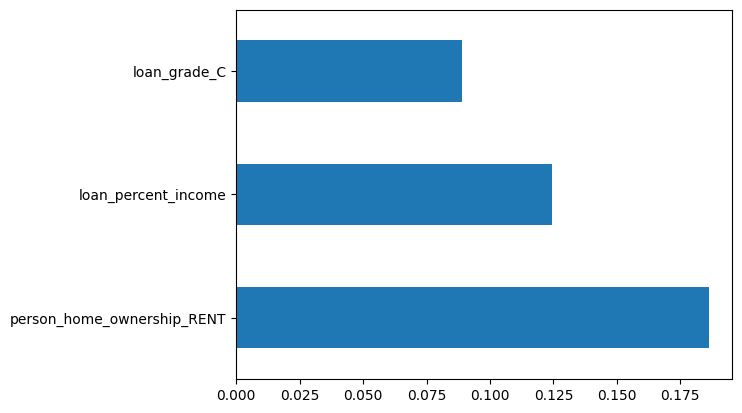

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/xiang38f/111-2-4-56-midtrem/main/credit_risk_dataset.csv")

# Prepare the dataset
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200]
}

# Train an XGBoost model with GridSearchCV
xgb_model = xgb.XGBClassifier()
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print('Best Hyperparameters:', grid_search.best_params_)
print('Accuracy:', grid_search.best_score_)

# Evaluate the model's performance on the test set
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred))

# Get feature importance
importance = grid_search.best_estimator_.feature_importances_
feat_importances = pd.Series(importance, index=X.columns)
feat_importances.nlargest(3).plot(kind='barh')

#without early stopping